In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/home/tanmoy_chakraborty00001/data-science-learning/Projects/Projects01_Data-Science/DS_Mini-Projects/MP02_CustomerBehaviour_EDA/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Univariate Analysis**

### **Age Distribution**

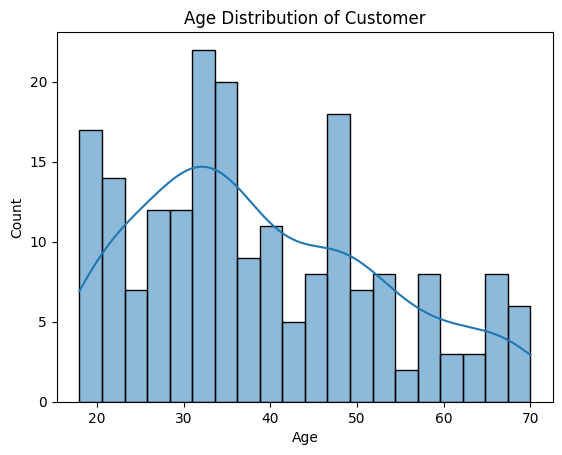

In [10]:
plt.figure()
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customer')
plt.show()

### **Annual Income Distribution**

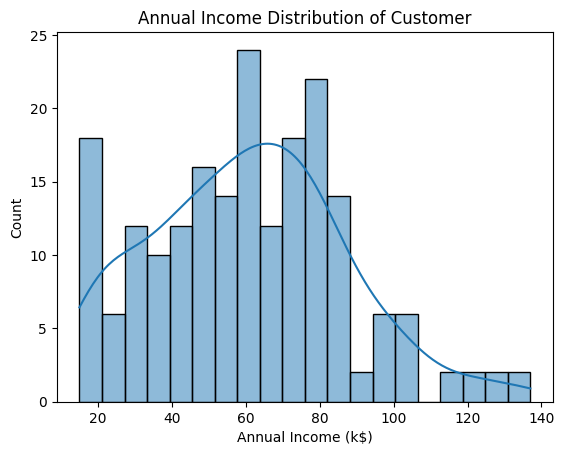

In [12]:
plt.figure()
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution of Customer')
plt.show()

### **Spending Score Distribution**

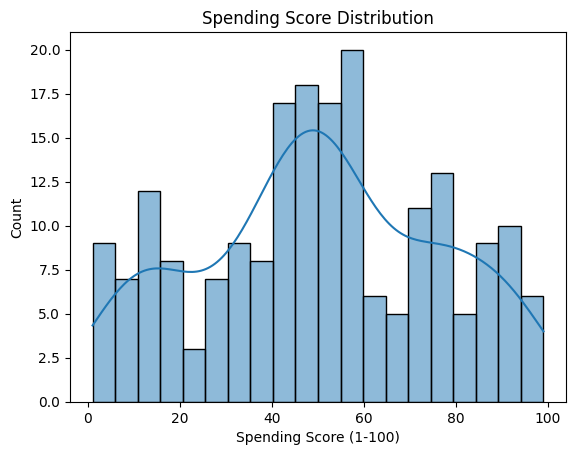

In [13]:
plt.figure()
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.show()

# **Bivariate Analysis**

### **Gender vs Spending Score**

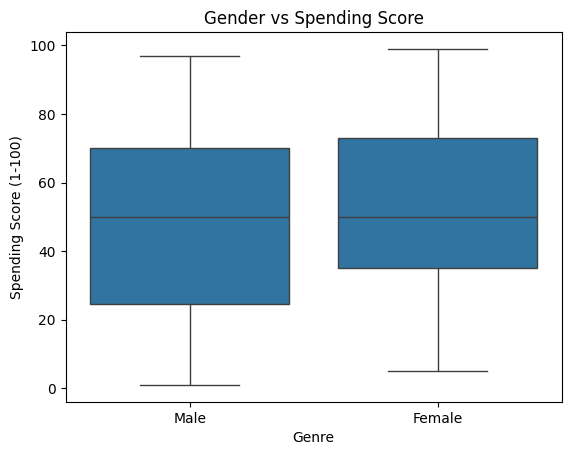

In [ ]:
plt.figure()
sns.boxplot(x=df['Genre'], y=df['Spending Score (1-100)'], data=df)
plt.title('Gender vs Spending Score')
plt.show()

### **Age vs Annual Income**

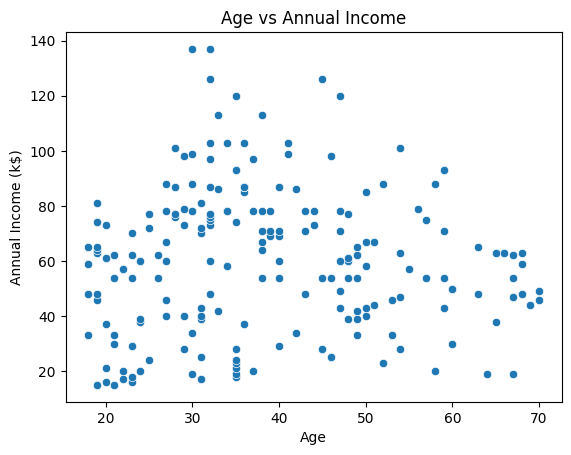

In [16]:
plt.figure()
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], data=df)
plt.title('Age vs Annual Income')
plt.show()

### **Correlation Analysis**

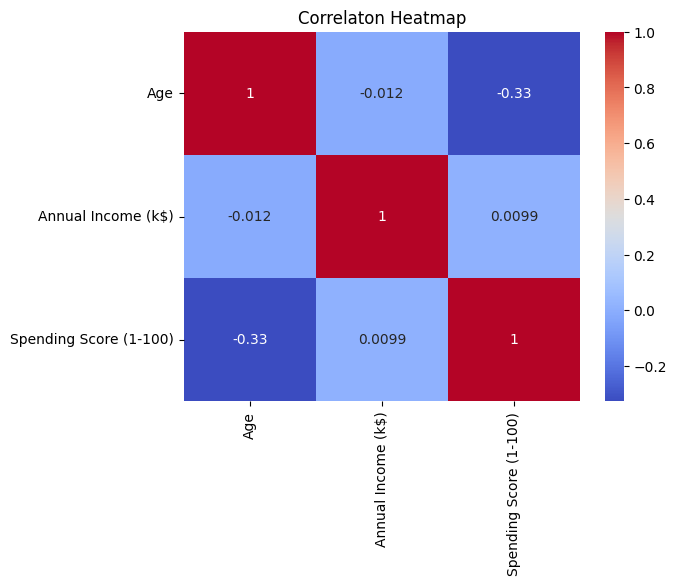

In [18]:
corr = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlaton Heatmap')
plt.show()

# **Multivariate Analysis**

### **Customer Segments by Age, Gender, Purchase Patterns**

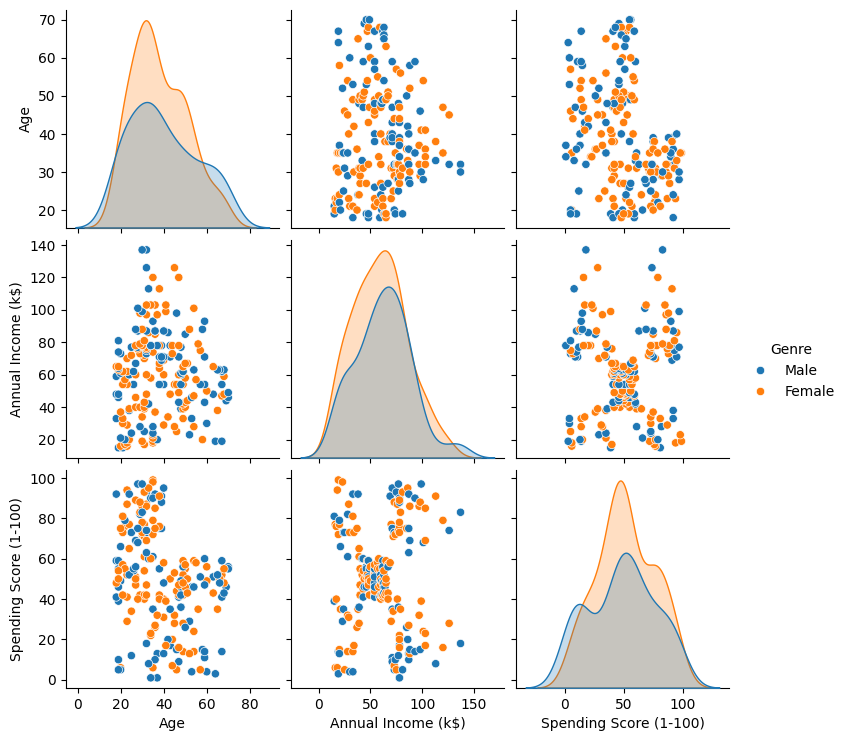

In [23]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre']], hue='Genre')
plt.show()

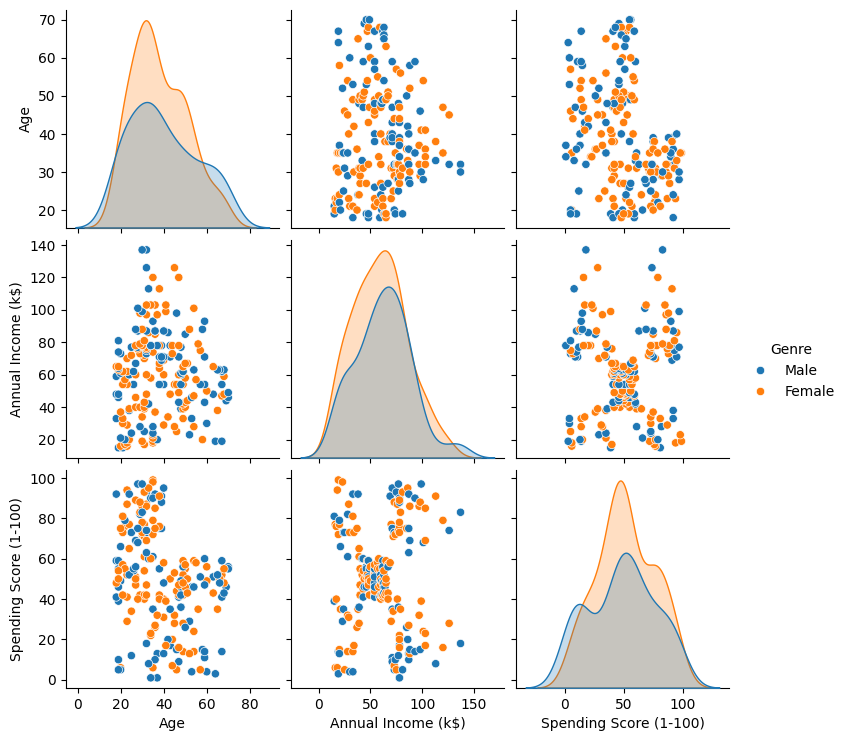

In [24]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre']], hue='Genre', diag_kind='kde')
plt.show()

### **Clustering for Customer Segmentation**

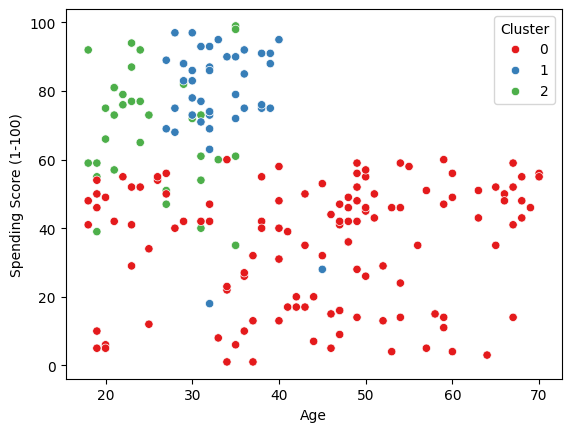

In [26]:
from sklearn.cluster import KMeans
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.show()